<a href="https://colab.research.google.com/github/RicardoMorato/IntroToAI/blob/main/digit_recognition_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets

digits = datasets.load_digits()

print("digits.images: " + str(digits.images.shape))
print("digits.target: " + str(digits.target.shape))

digits.images: (1797, 8, 8)
digits.target: (1797,)


In [2]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

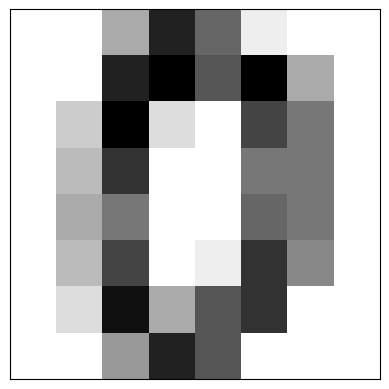

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False,
)

plt.imshow(digits.images[0], cmap=plt.cm.gray_r)

In [5]:
digits.target[0]

0

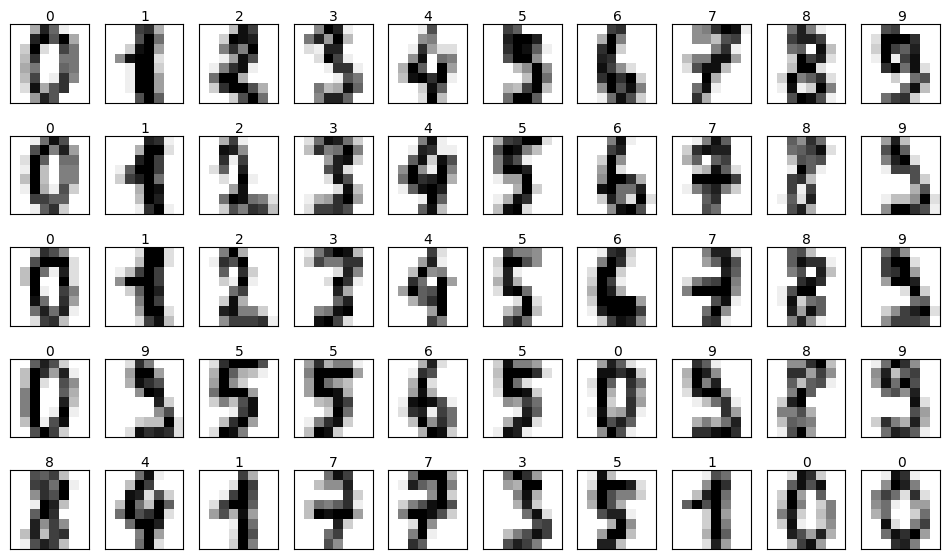

In [6]:
fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={"xticks": [], "yticks": []})

for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap=plt.cm.gray_r)
  ax.text(0.45, 1.05, str(digits.target[i]), transform=ax.transAxes)

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

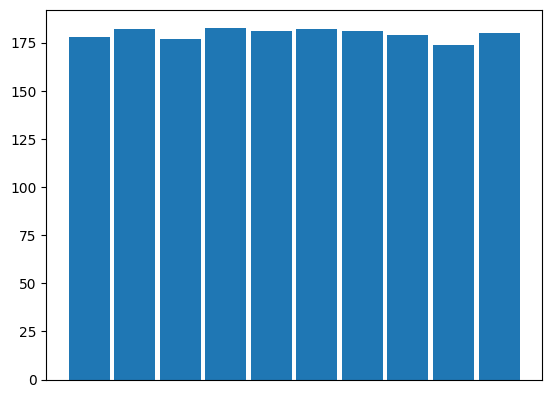

In [7]:
plt.xticks([])
plt.hist(digits.target, rwidth=0.9)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=0
)

model = LogisticRegression(max_iter=5000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [10]:
model.score(x_test, y_test)

0.9583333333333334

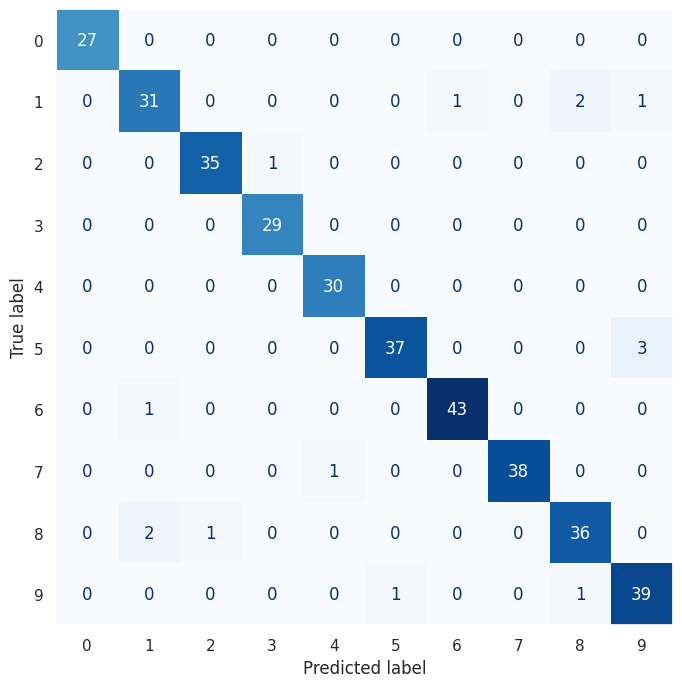

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay as cmd
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize=(8,8))
ax.grid(False)
cmd.from_estimator(model, x_test, y_test, cmap="Blues", colorbar=False, ax=ax)

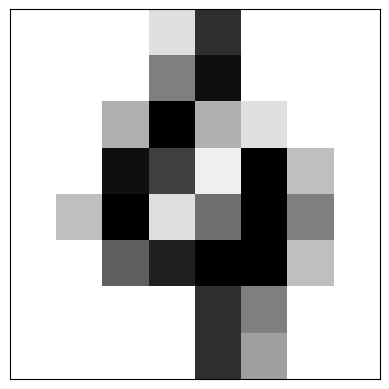

In [12]:
# Pick one of the digits from the dataset and plot it to see what it looks like
sns.reset_orig() # Undo sns.set()

plt.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False,
)

plt.imshow(digits.images[100], cmap=plt.cm.gray_r)

In [13]:
model.predict([digits.data[100]])[0]

4

In [14]:
model.predict_proba([digits.data[100]])

array([[5.95428833e-11, 4.74891832e-09, 9.31364340e-21, 2.83367818e-22,
        9.99999988e-01, 1.07481052e-15, 7.12742011e-09, 1.49800202e-10,
        2.34180317e-12, 5.17498967e-22]])

In [15]:
model.predict_proba([digits.data[100]])[0][4]

0.9999999879119755